In [1]:
import gym
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0',is_slippery=True)
q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
ep_num = 5000
epsilon = 0.3

In [3]:
def epsilon_greedy(Q, epsilon, state):
    if np.random.random() <= epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state][:])

In [ ]:
for i in tqdm(range(ep_num)):
    state = env.reset()
    done = False
    action = epsilon_greedy(q_value, epsilon, state)
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = epsilon_greedy(q_value, epsilon, state)
        action_value =  q_value[next_state][next_action]
        q_value[state][action] += 0.1 * (reward + 0.9 * action_value - q_value[state][action])
        state = next_state
        action = next_action

100%|██████████| 5000/5000 [00:01<00:00, 4965.67it/s]


In [ ]:
w_r = []
EPISODE_NUM = 5000
TEST_NUM = 50
for k in tqdm(range(100)):
  q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
  win_rates = []
  for j in range(EPISODE_NUM):
    state = env.reset()
    done = False
    action = epsilon_greedy(q_value, epsilon, state)
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = epsilon_greedy(q_value, epsilon, state)
        action_value =  q_value[next_state][next_action]
        q_value[state][action] += 0.1 * (reward + 0.9 * action_value - q_value[state][action])
        state = next_state
        action = next_action
    policy = [np.argmax(actions) for actions in q_value]
    win_rate = 0
    steps = [0 for i in range(TEST_NUM)]
    for i in range(TEST_NUM):
      env.reset()
      done = False
      s = 0
      while not done:
        s, r, done, _ = env.step(policy[s])
        steps[i] += 1
      if r>0:
        win_rate += 1
    win_rates.append(win_rate/100)
  w_r.append(win_rates)

 48%|████▊     | 48/100 [38:58<44:34, 51.44s/it]

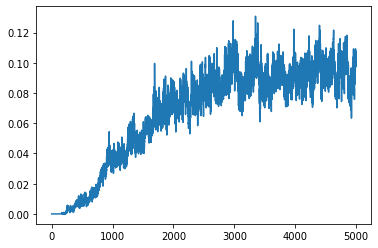

In [11]:
plt.plot(np.mean(w_r, axis = 0))